# Read results from distributed files {#ref_distributed_files}

Solvers usually solve analysis with distributed architecture. In this
case, one file is written by spatial or temporal domains. DPF is capable
of reading one result in distributed files. This allows it to skip the
merging of files on the solver side, which is time-consuming and often
doubles the memory used.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

# Create the data sources

First create a data sources with one result file by domain


In [2]:
distributed_file_path = examples.download_distributed_files()
data_sources = dpf.DataSources()
data_sources.set_domain_result_file_path(distributed_file_path[0], 0)
data_sources.set_domain_result_file_path(distributed_file_path[1], 1)

# Compute displacements

Once the file architecture is put in the data sources, computing
displacements with or without domain has the exact same syntax. DPF
reads parts of the result on each domain and merges these results in the
outputs fields. The output is no different than when using combined or
distributed files.


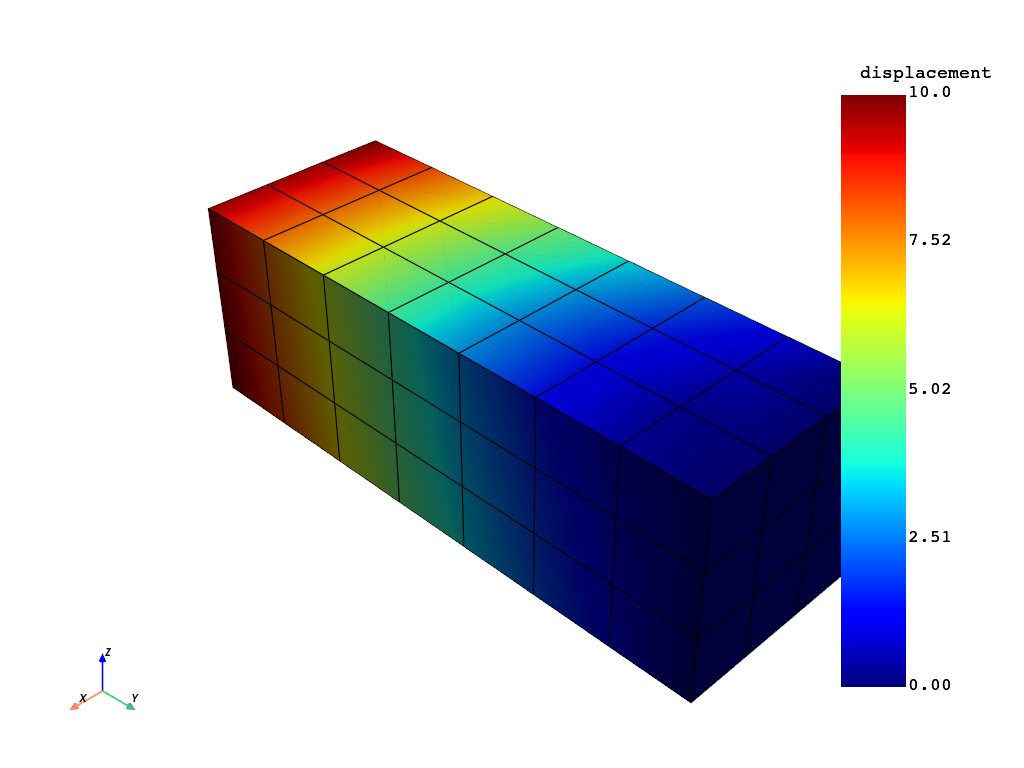

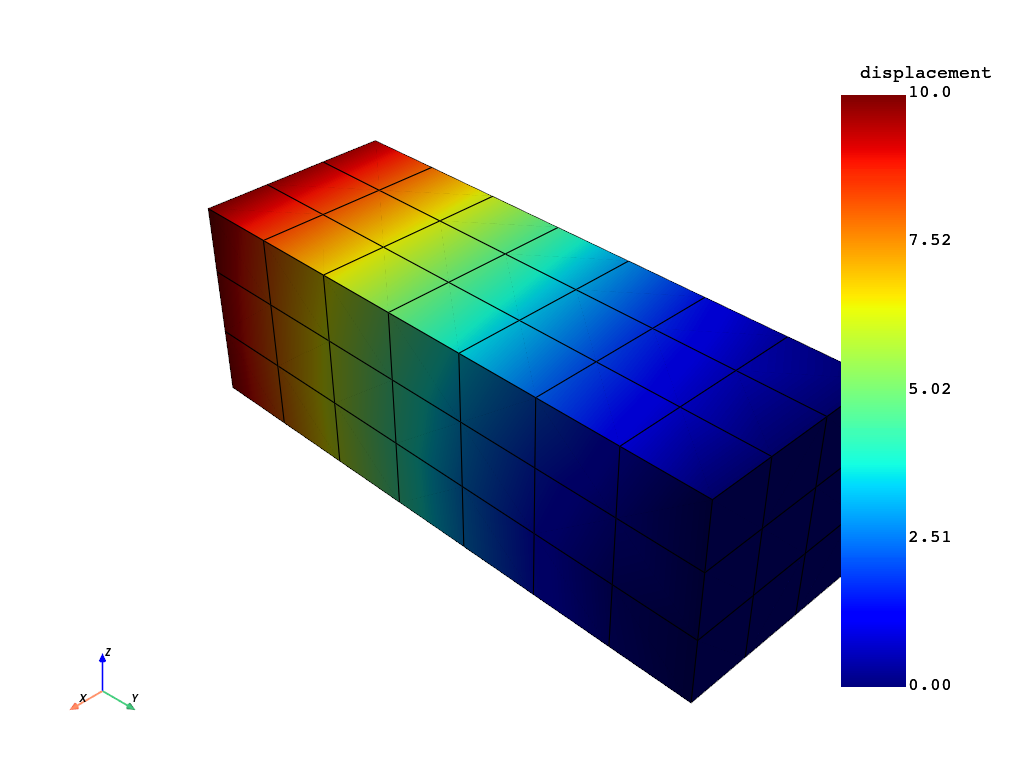

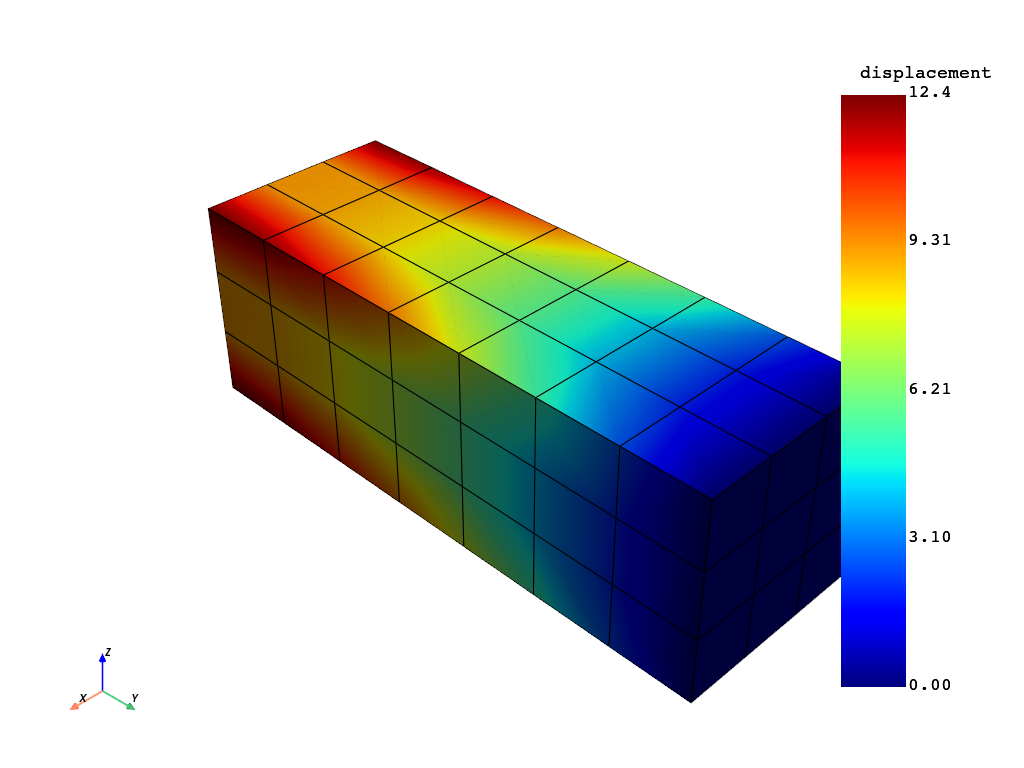

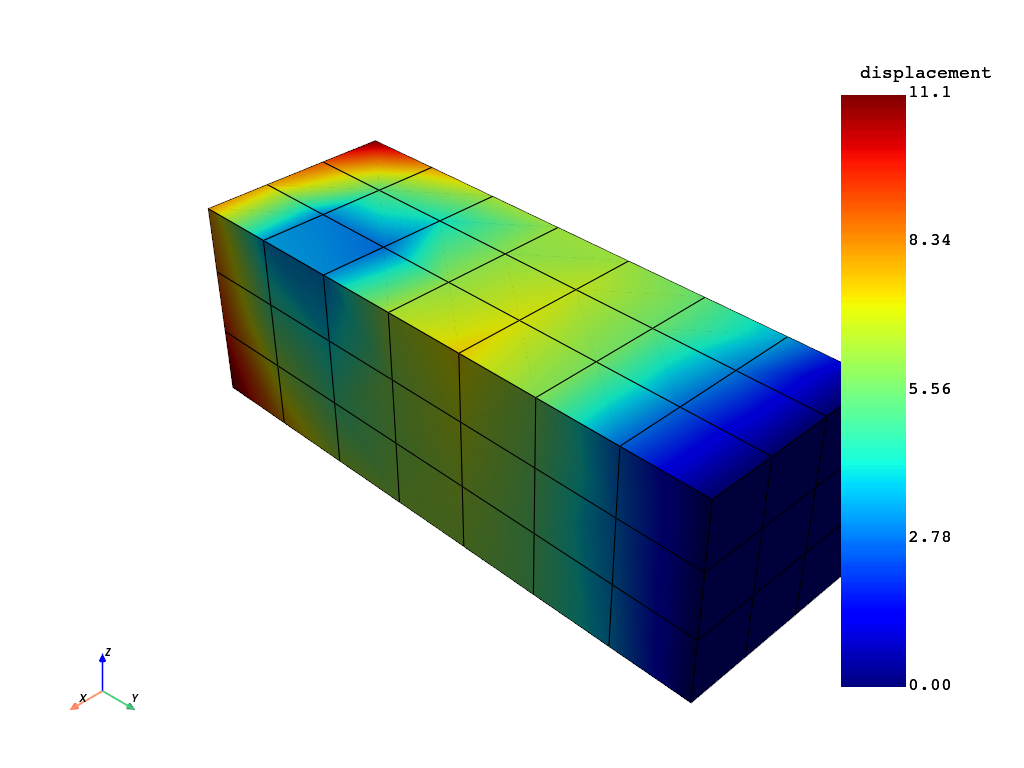

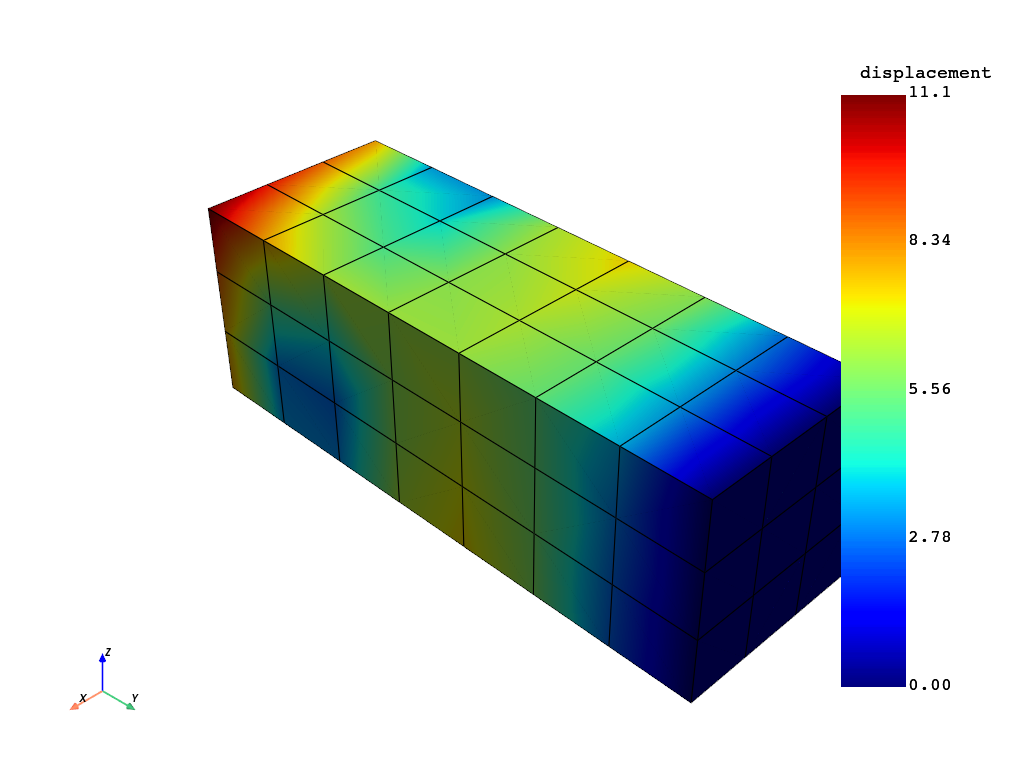

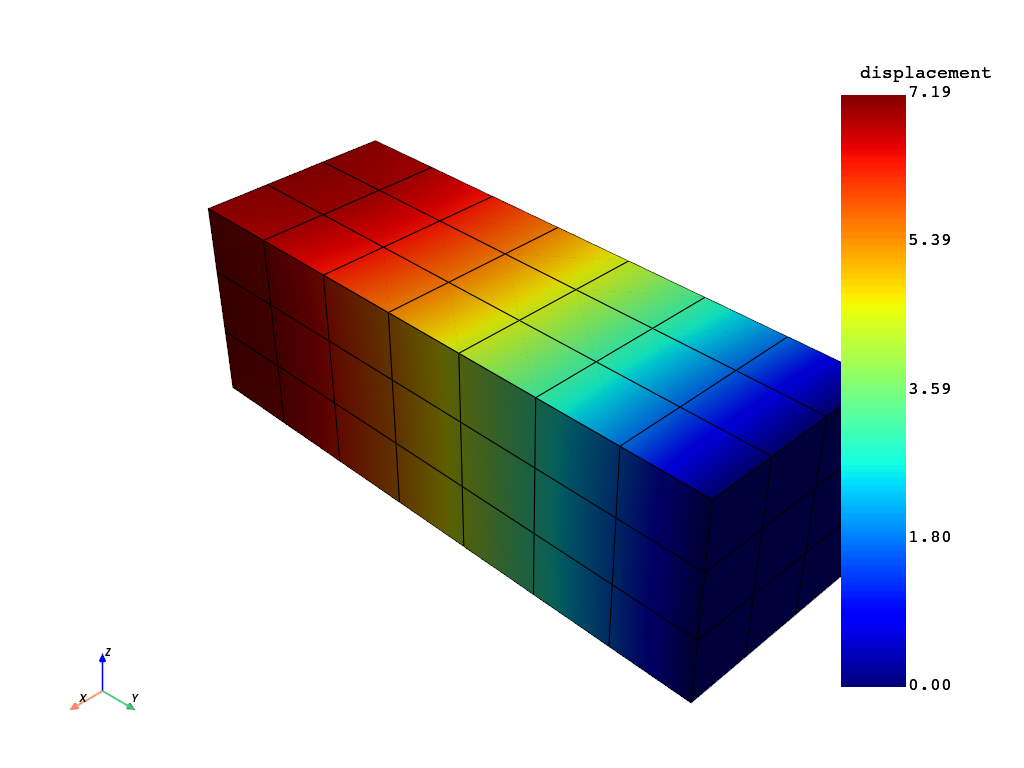

In [3]:
model = dpf.Model(data_sources)
disp = model.results.displacement.on_all_time_freqs.eval()

freq_scoping = disp.get_time_scoping()
for freq_set in freq_scoping:
    model.metadata.meshed_region.plot(disp.get_field_by_time_complex_ids(freq_set, 0))

# Compute equivalent stress


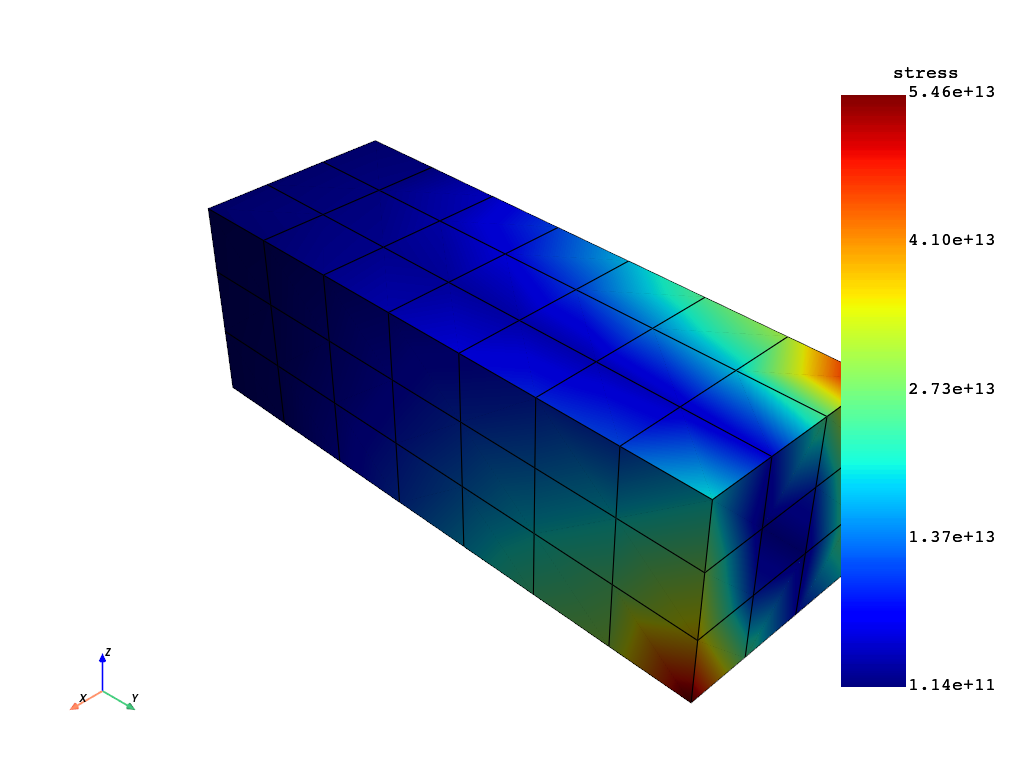

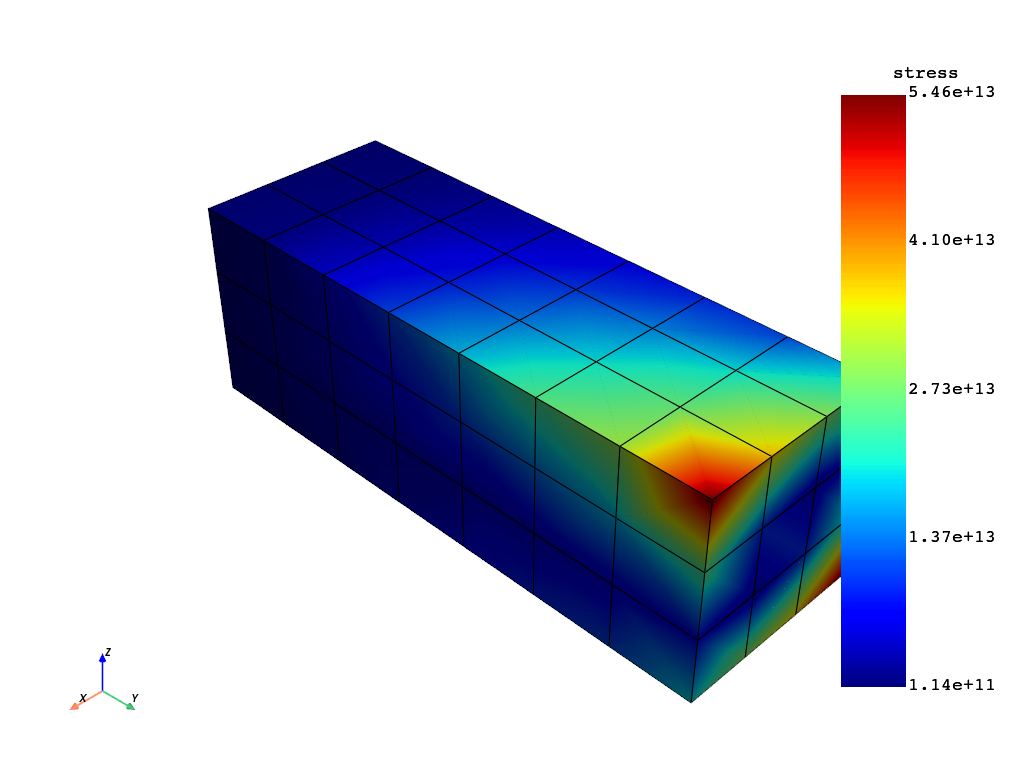

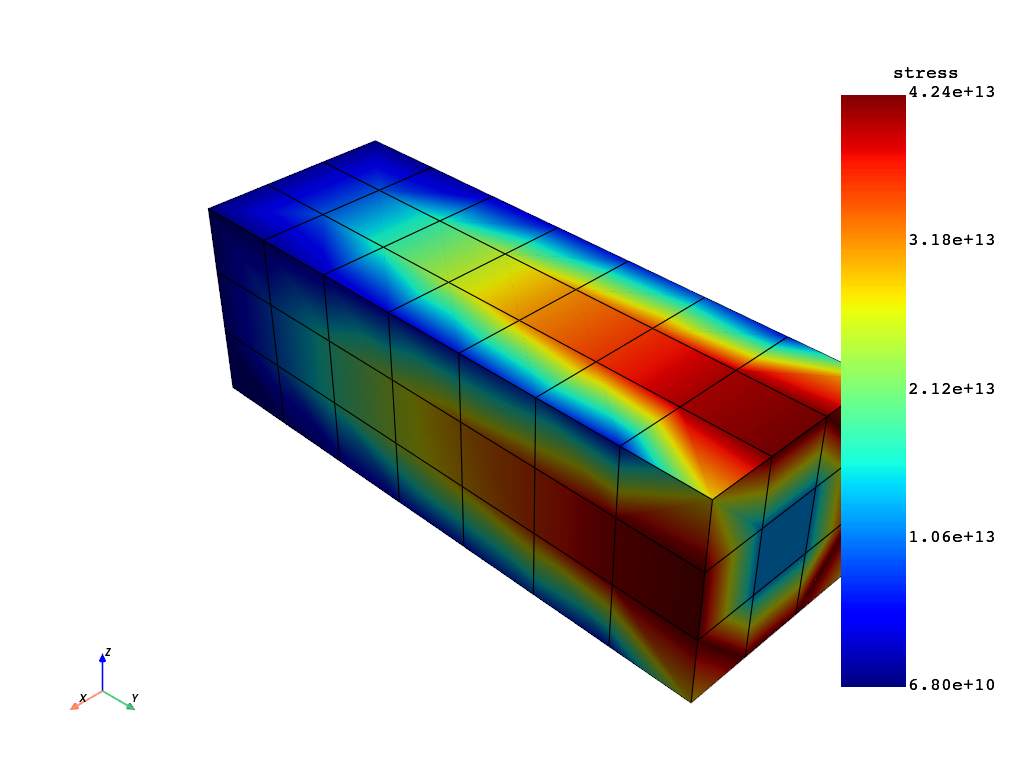

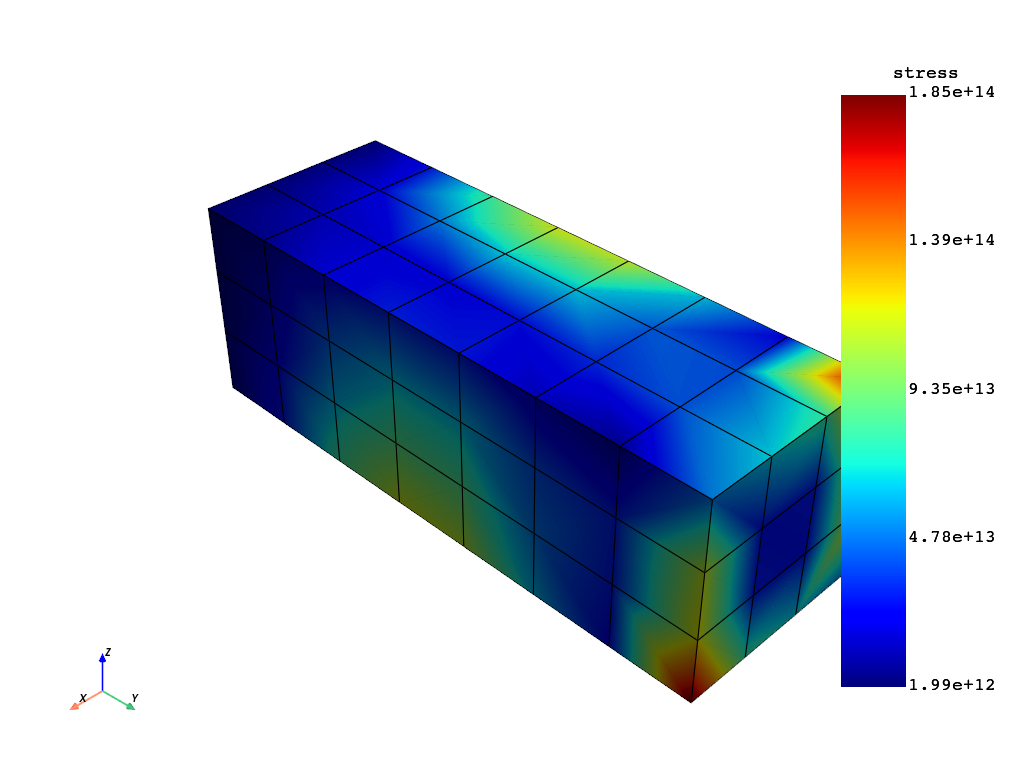

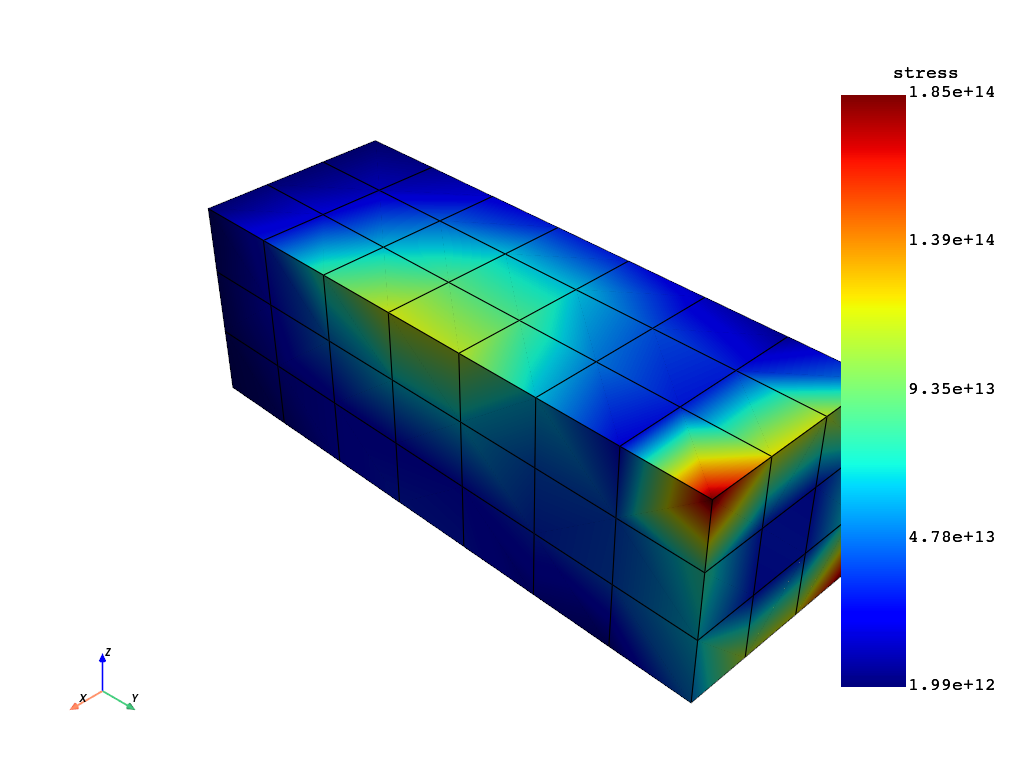

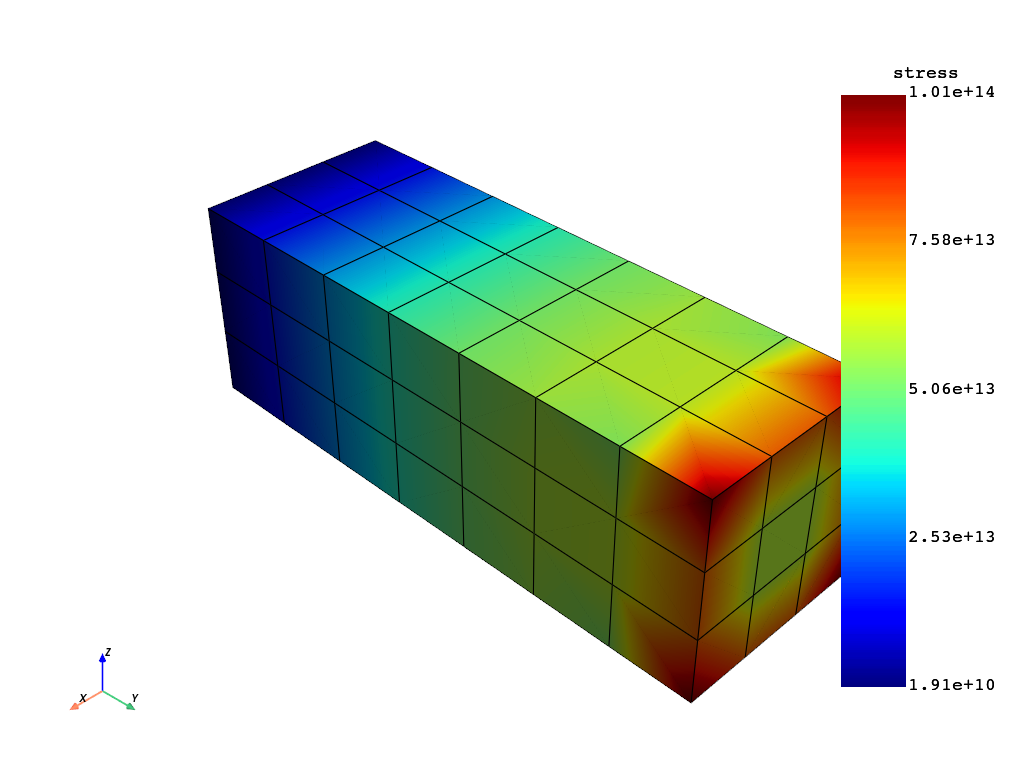

In [4]:
stress_res = model.results.stress
stress_res.on_location(dpf.locations.nodal)
stress = stress_res.on_all_time_freqs.eval()

freq_scoping = stress.get_time_scoping()
for freq_set in freq_scoping:
    model.metadata.meshed_region.plot(stress.get_field_by_time_complex_ids(freq_set, 0))